In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\tj200\repos\Movie_Analysis\movies\movies.csv')

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [51]:
#Clean the data
#Look for anything missing/ambigious only in the columns


for col in df.columns:
    missing_count = df[col].isnull().sum()
    print (col,missing_count)

#change the data type
#Cannot convert directly because of missing values
df = df.dropna(subset=['budget','votes','runtime'])

df['budget'] = df['budget'].astype('int')
df['votes'] = df['votes'].astype('int')
df['runtime'] = df['runtime'].astype('int')

#Drop duplicates
df.drop_duplicates()


name 0
rating 17
genre 0
year 0
released 0
score 0
votes 0
director 0
writer 0
star 1
country 1
budget 0
gross 57
company 4
runtime 0


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559.0,Beijing Diqi Yinxiang Entertainment,149
7654,Star Trek First Frontier,NaN,Sci-Fi,2020,"September 8, 2020 (United States)",5.7,165,Kenneth Smith,Keith Brooks,Robert Pralgo,United States,370000,NaN,An Impulsive Production,85
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,NaN,Notis Studio,78


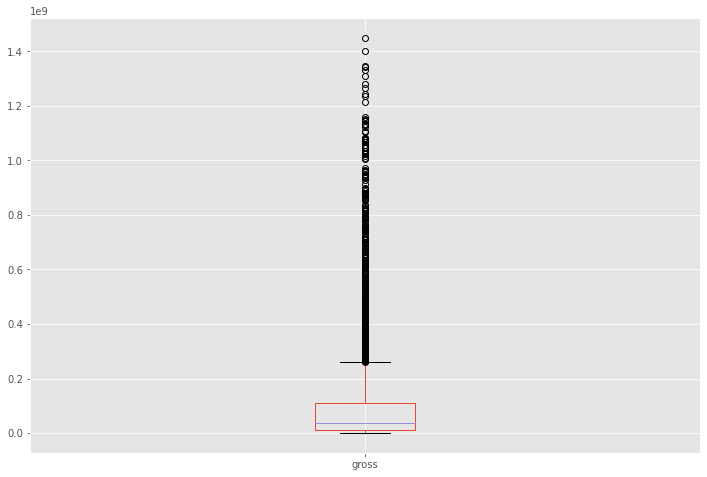

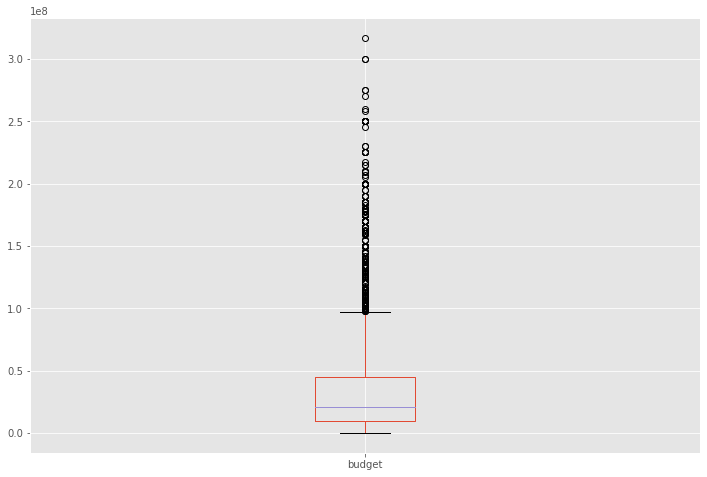

In [56]:
#Check for inconsistency, mainly worried about gross and budegt

df.boxplot(column=['gross'])
plt.show()
df.boxplot(column=['budget'])
plt.show()

max(df['gross'])
#fix the outliers
df = df[df['gross'] <= 1500000000]
df = df[df['budget'] <= 30000000]

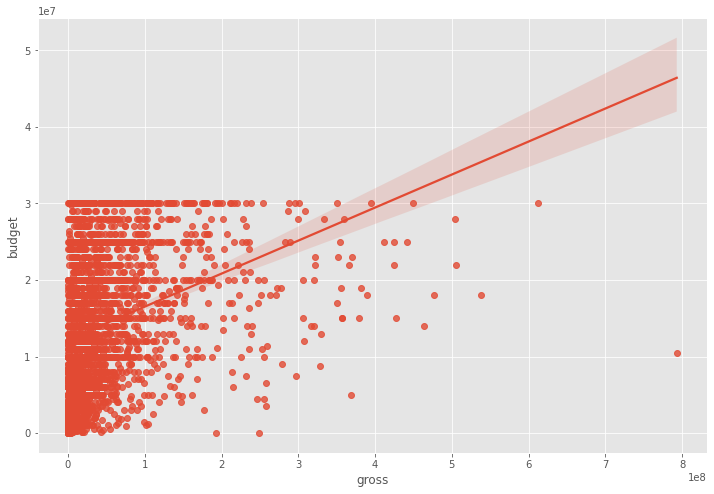

<AxesSubplot:xlabel='gross', ylabel='score'>

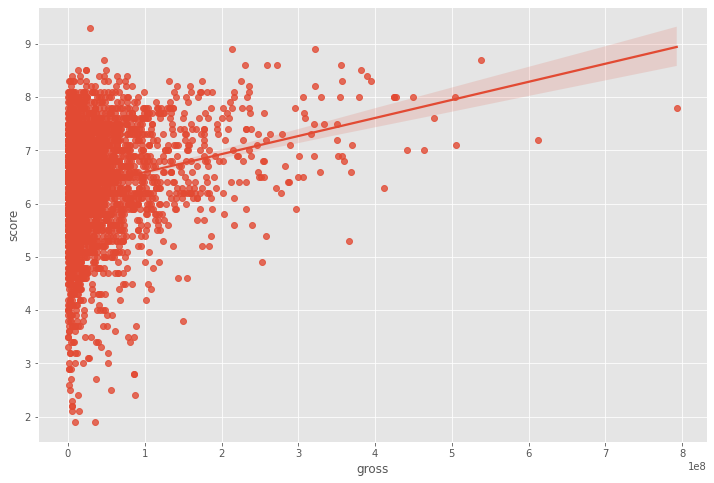

In [63]:
sns.regplot(x='gross',y='budget',data=df)
plt.show()

#Check ratings compared to budget
sns.regplot(x='gross',y='score',data=df)